In [1]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
x_data = np.loadtxt("../data/Q4/q4x.dat")
labels = np.loadtxt("../data/Q4/q4y.dat", dtype=str)
y_data = np.where(labels == "Alaska", 0, 1).reshape(x_data.shape[0],1)

In [5]:
def normalise(X):
    mean_X = np.mean(X,axis = 0)
    std_X = np.std(X,axis = 0)
    print(mean_X,std_X)

    for j in range(X.shape[1]):
        X[:,j] = (X[:,j] - mean_X[j])/std_X[j]
    return X
x_data = normalise(x_data)

[117.92 398.14] [25.87070931 46.00826447]


In [6]:

def draw_plots(y,X):
    y = y.flatten()
    plt.clf()
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', color='red', label='Alaska')
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', color='blue', label='Canada')
    plt.xlabel('x1_normalized')
    plt.ylabel('x2_normalized')
    plt.legend()
    plt.title("Data Distribution")
    plt.show()

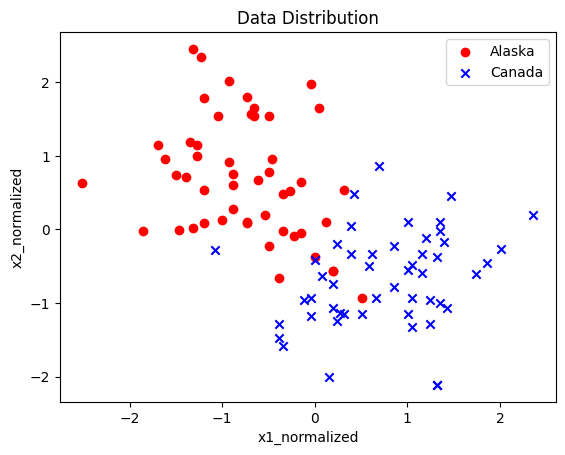

In [5]:
draw_plots(y_data,x_data)

In [6]:
x_data[:,0].shape

(100,)

In [7]:
def calculate_mean(X,Y):
    mu_0 = np.zeros((1,2))
    mu_1 = np.zeros((1,2))
    m = Y.shape[0]
    for i in range(m):
        mu_0  += (1-Y[i , 0]) * X[ i , :]  
        mu_1  += Y[i, 0] * X[i,:]
    cnt_0 =  (Y == 0).sum()
    cnt_1 = (Y == 1).sum()
    mu_0 = mu_0 / cnt_0
    mu_1 = mu_1 / cnt_1

    return  mu_0 , mu_1

In [8]:
def covariance_equal(X,Y,mu_0,mu_1):
    mu_0 = mu_0.reshape((X.shape[1],1))
    mu_1 = mu_1.reshape((X.shape[1],1))
    m = X.shape[0]
    n = X.shape[1]
    sigma = np.zeros((n,n))

    for i in range(m):
        x_i = X[i , :].reshape(n,1)
        sigma += (x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]) @ (x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]).T

    sigma = sigma / m
    return sigma     




In [9]:
mu_0 , mu_1 = calculate_mean(x_data,y_data)

In [10]:
print(f"mu_0 = {mu_0}")
print(f"mu_1 = {mu_1}")

mu_0 = [[-0.75529433  0.68509431]]
mu_1 = [[ 0.75529433 -0.68509431]]


In [11]:
sigma_equal = covariance_equal(x_data , y_data ,mu_0 , mu_1)
print(f"sigma_equal = {sigma_equal}")

sigma_equal = [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [12]:
def covariance_different(X,Y,mu_0,mu_1):
    mu_0 = mu_0.reshape((X.shape[1],1))
    mu_1 = mu_1.reshape((X.shape[1],1))
    m = X.shape[0]
    n = X.shape[1]
    sigma_0 = np.zeros((n,n))
    sigma_1 = np.zeros((n,n))
    cnt_0 =  (Y == 0).sum()
    cnt_1 = (Y == 1).sum()
    for i in range(m):
        x_i = X[i , :].reshape(n,1)
        sigma_0 += (1-Y[i ,0]) * ((x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]) @ (x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]).T)
        sigma_1 += (Y[i , 0]) * ((x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]) @ (x_i - (mu_0 * (1-Y[i ,0]) ) - mu_1 * Y[i , 0]).T)


    sigma_0 = sigma_0 / cnt_0
    sigma_1 = sigma_1 / cnt_1
    
    return sigma_0 , sigma_1

In [13]:
sigma_diff_0 , sigma_diff_1 = covariance_different(x_data,y_data,mu_0,mu_1)
print(sigma_diff_0,sigma_diff_1)

[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]] [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [14]:
def phi_0(Y):
    return ((Y == 0).sum()) / Y.shape[0]

In [15]:
phi_0 = phi_0(y_data)
print(phi_0)

0.5


In [16]:
def qadratic_eq(x_data , mu_0,mu_1,sigma_diff_0,sigma_diff_1,phi_0 ,err):
    return abs(
        (x_data-mu_0) @ np.linalg.inv(sigma_diff_0) @ (x_data-mu_0).T * 0.5 
      - (x_data-mu_1) @ np.linalg.inv(sigma_diff_1) @ (x_data-mu_1).T * 0.5
      + np.log(np.linalg.det(sigma_diff_0)) - np.log(np.linalg.det(sigma_diff_1)) * 0.5
      + np.log(phi_0/(1-phi_0))
    ) < err

In [ ]:
def get_pts(mu_0,mu_1,sigma_diff_0,sigma_diff_1,phi_0):
    pts = []
    x1_range = np.linspace(-2.5, 2.5, 500)
    x2_range = np.linspace(-2.5, 2.5, 500)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    err = 0.005
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            x_i = np.array([x1[i,j],x2[i,j]])
            if qadratic_eq(x_i,mu_0,mu_1,sigma_diff_0,sigma_diff_1,phi_0,err):
                pts.append(x_i)
    pts = np.array(pts) 
    return pts            


def draw_plots_boundary(y,X,mu_0,mu_1,sigma_equal,sigma_diff_0,sigma_diff_1,phi_0):
    plt.clf()
    y = y.flatten() 
    pts = get_pts(mu_0,mu_1,sigma_diff_0,sigma_diff_1,1-phi_0) 
    plt.plot( pts[:, 0],pts[:, 1], 'g-', label='Quadratic boundary')
     
    pts1 = get_pts(mu_0,mu_1,sigma_equal,sigma_equal,1-phi_0)
    plt.plot( pts1[:, 0],pts1[:, 1], 'black', label='Linear boundary')
          
    
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', color='red', label='Alaska')
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', color='blue', label='Canada')
    plt.xlabel('x1_normalized')
    plt.ylabel('x2_normalized')
    plt.legend()
    plt.title('Decision Boundary')
    plt.show()

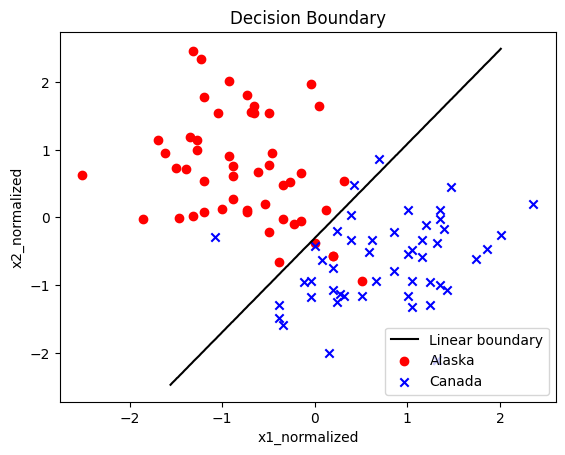

In [21]:
draw_plots_boundary(y_data,x_data,mu_0,mu_1,sigma_equal,sigma_diff_0,sigma_diff_1,phi_0)